In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.MC_results/S1_MC_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.000,0.158,0.762,1.521
1,Node 2,0.000,2.044,3.894,5.199
2,Node 3,10.286,18.677,22.826,25.725
3,Node 4,0.000,3.039,5.410,6.950
4,Node 5,0.000,0.337,1.378,2.335
...,...,...,...,...,...
60,Node 61,0.000,0.207,0.712,1.085
61,Node 62,0.000,0.299,0.823,0.980
62,Node 63,0.000,0.000,0.344,0.753
63,Node 64,0.000,0.000,0.170,0.367


In [2]:
##############
file_name = "d.smokedetector_t/2870_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


In [3]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


#### Pearson 상관계수

In [4]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)

#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)
source = list(df_1st[(df_1st['Node'] == 'Node 40')].index.tolist())
df_1st.drop(source, inplace = True)

<Axes: >

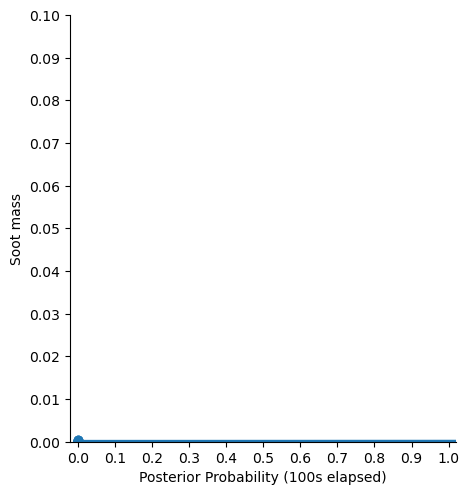

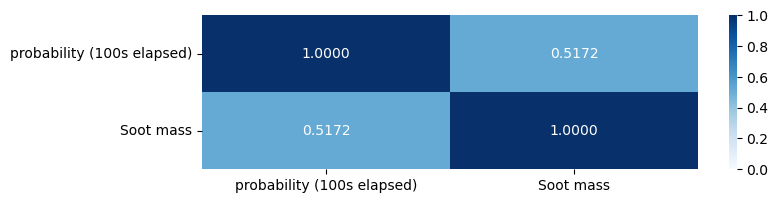

In [5]:
g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='pearson')

sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

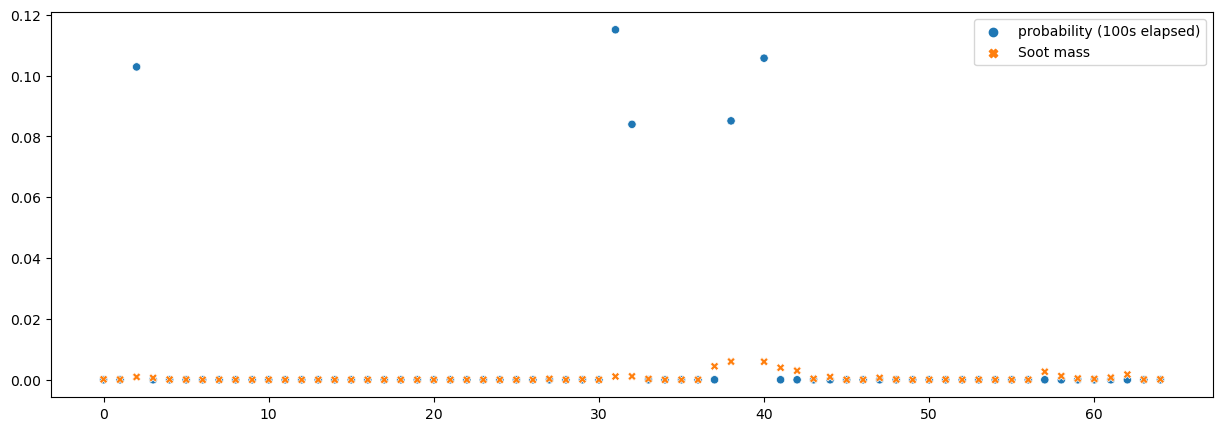

In [6]:
df_1st_multiply = df_1st.copy()
df_1st_multiply['Soot mass'] = df_1st_multiply['Soot mass'] *10
df_1st_multiply['probability (100s elapsed)'] = df_1st_multiply['probability (100s elapsed)'] / 100
plt.figure(figsize=(15,5))
lineplot_1= sns.scatterplot(data=df_1st_multiply[['probability (100s elapsed)', 'Soot mass']])

<Axes: >

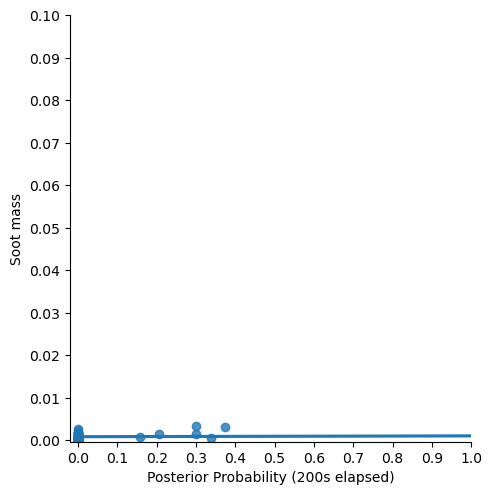

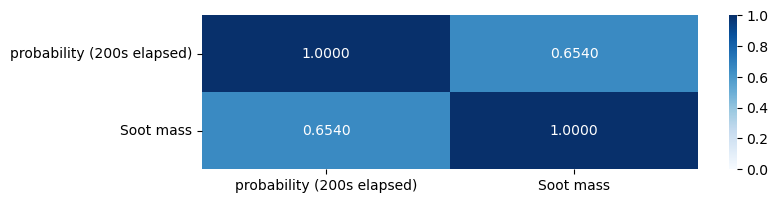

In [7]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

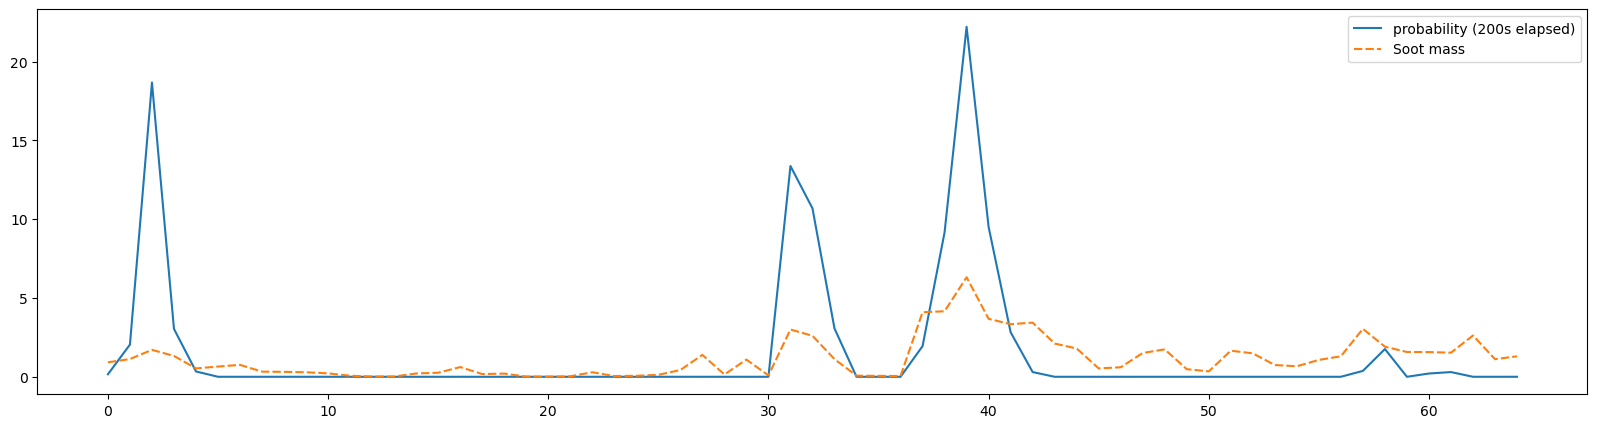

In [8]:
df_2nd_multiply = df_2nd.copy()
df_2nd_multiply['Soot mass'] = df_2nd_multiply['Soot mass']*1000
plt.figure(figsize=(20,5))
lineplot_1= sns.lineplot(data=df_2nd_multiply[['probability (200s elapsed)', 'Soot mass']])

<Axes: >

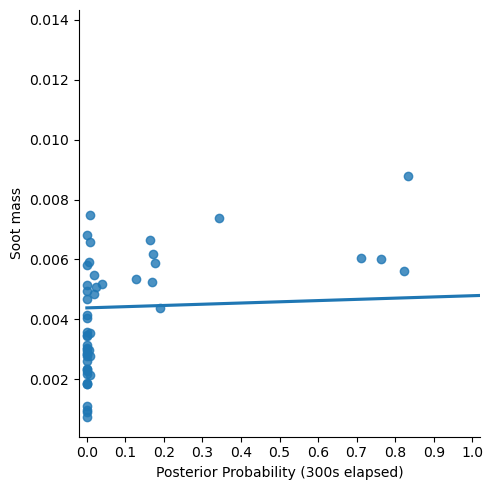

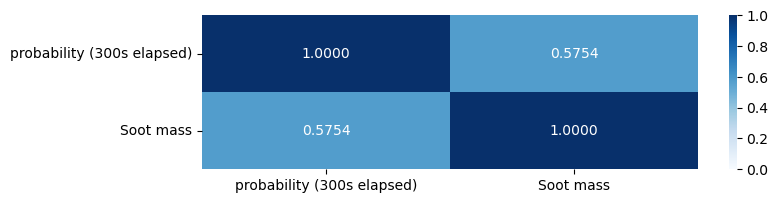

In [9]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

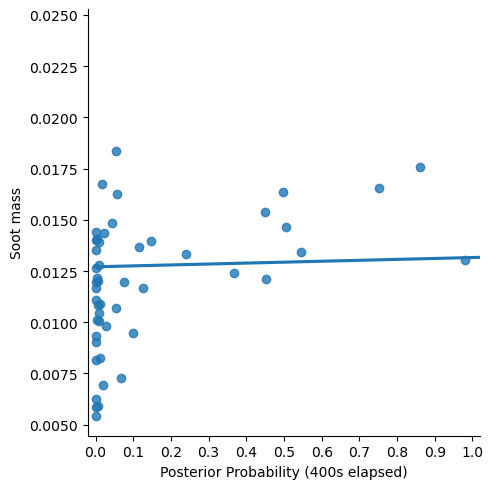

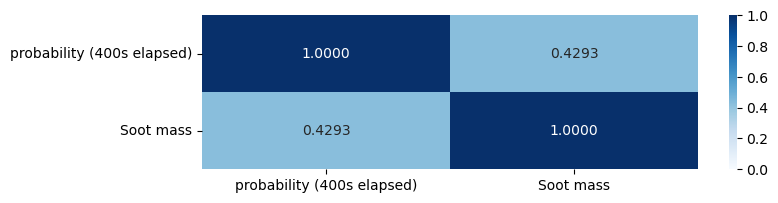

In [10]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

#### pearson & p-value 검정

In [11]:
p_df_1st = df_1st.dropna()
p_df_1st['probability (100s elapsed)'].values
p_df_1st['Soot mass'].values

p_df_2nd = df_2nd.dropna()
p_df_2nd['probability (200s elapsed)'].values
p_df_2nd['Soot mass'].values

p_df_3rd = df_3rd.dropna()
p_df_3rd['probability (300s elapsed)'].values
p_df_3rd['Soot mass'].values

p_df_4th = df_4th.dropna()
p_df_4th['probability (400s elapsed)'].values
p_df_4th['Soot mass'].values

print(stats.pearsonr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.pearsonr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.pearsonr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.pearsonr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

PearsonRResult(statistic=0.5172490616425174, pvalue=1.2064563102755388e-05)
PearsonRResult(statistic=0.6539578189451916, pvalue=3.4877527119418337e-09)
PearsonRResult(statistic=0.575379651037017, pvalue=5.341234084509831e-07)
PearsonRResult(statistic=0.42929683944273134, pvalue=0.00035914427934865737)


#### spearman & pvalue 상관계수

In [12]:
print(stats.spearmanr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.spearmanr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.spearmanr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.spearmanr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

SignificanceResult(statistic=0.4127308383658831, pvalue=0.0007009225877781968)
SignificanceResult(statistic=0.6346296546823075, pvalue=1.372214253119836e-08)
SignificanceResult(statistic=0.7969870141276229, pvalue=1.9975711516451308e-15)
SignificanceResult(statistic=0.7057876240323365, pvalue=5.174064354416361e-11)


In [13]:
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error

pred1_value = p_df_1st['probability (100s elapsed)'].values
true1_value = p_df_1st['Soot mass'].values
rmse1 = math.sqrt(mean_squared_error(true1_value,pred1_value))
print('rmse1:', rmse1)

pred2_value = p_df_2nd['probability (200s elapsed)'].values
true2_value = p_df_2nd['Soot mass'].values
rmse2 = math.sqrt(mean_squared_error(true2_value,pred2_value))
print('rmse2:', rmse2)

pred3_value = p_df_3rd['probability (300s elapsed)'].values
true3_value = p_df_3rd['Soot mass'].values
rmse3 = math.sqrt(mean_squared_error(true3_value,pred3_value))
print('rmse3:', rmse3)

pred4_value = p_df_4th['probability (400s elapsed)'].values
true4_value = p_df_4th['Soot mass'].values
rmse4 = math.sqrt(mean_squared_error(true4_value,pred4_value))
print('rmse4:', rmse4)

rmse1: 2.7753172965882063
rmse2: 4.553335932479424
rmse3: 4.139812834924489
rmse4: 4.088663788673402


In [14]:
import numpy as np

def fft_calculation(predict, observe):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
fft_calculation(pred1_value,true1_value)
fft_calculation(pred2_value,true2_value)
fft_calculation(pred3_value,true3_value)
fft_calculation(pred4_value,true4_value)

FFT 그래프 간의 상관관계: 0.49138258954380226
FFT 그래프 간의 상관관계: 0.6244629946909288
FFT 그래프 간의 상관관계: 0.5936747093966237
FFT 그래프 간의 상관관계: 0.5686360201305743


In [15]:
import math
import numpy as np
p_df_1st = df_1st.dropna()
p_df_2nd = df_2nd.dropna()
p_df_3rd = df_3rd.dropna()
p_df_4th = df_4th.dropna()
def Z_normalized(rawdata, adjust=False):
    m = np.mean(rawdata) # 평균, numpy필요
    s = (math.sqrt(np.mean(rawdata-m)**2)) # 표준편차, math 필요
    
    Z = (rawdata - m) / s # Z정규화
    
    if adjust == True:
        Z = (Z-min(Z)) / (max(Z) - min(Z))
    
    return Z

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

In [16]:
#### spearman & pvalue 상관계수

Z_1=Z_normalized(p_df_1st['Soot mass'].values, True)
Z_2=Z_normalized(p_df_2nd['Soot mass'].values, True)
Z_3=Z_normalized(p_df_3rd['Soot mass'].values, True)
Z_4=Z_normalized(p_df_4th['Soot mass'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.5172490616425174, pvalue=1.2064563102755388e-05)
2: PearsonRResult(statistic=0.6539578189451916, pvalue=3.4877527119418337e-09)
3: PearsonRResult(statistic=0.5753796510370169, pvalue=5.341234084509831e-07)
4: PearsonRResult(statistic=0.42929683944273134, pvalue=0.00035914427934865737)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.41398231270635844, pvalue=0.0006725690188054513)
2: SignificanceResult(statistic=0.6346296546823075, pvalue=1.372214253119836e-08)
3: SignificanceResult(statistic=0.7969870141276229, pvalue=1.9975711516451308e-15)
4: SignificanceResult(statistic=0.7057876240323365, pvalue=5.174064354416361e-11)


In [17]:
Z_P_1 = Z_normalized(p_df_1st['probability (100s elapsed)'].values, True)
Z_P_2 = Z_normalized(p_df_2nd['probability (200s elapsed)'].values, True)
Z_P_3 = Z_normalized(p_df_3rd['probability (300s elapsed)'].values, True)
Z_P_4 = Z_normalized(p_df_4th['probability (400s elapsed)'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(Z_P_1,Z_1))
print('2:', pearsonr(Z_P_2,Z_2))
print('3:', pearsonr(Z_P_3,Z_3))
print('4:', pearsonr(Z_P_4,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(Z_P_1,Z_1))
print('2:', spearmanr(Z_P_2,Z_2))
print('3:', spearmanr(Z_P_3,Z_3))
print('4:', spearmanr(Z_P_4,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.5172490616425175, pvalue=1.2064563102755388e-05)
2: PearsonRResult(statistic=0.6539578189451916, pvalue=3.4877527119418337e-09)
3: PearsonRResult(statistic=0.5753796510370169, pvalue=5.341234084509831e-07)
4: PearsonRResult(statistic=0.42929683944273134, pvalue=0.00035914427934865737)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.41398231270635844, pvalue=0.0006725690188054513)
2: SignificanceResult(statistic=0.6346296546823075, pvalue=1.372214253119836e-08)
3: SignificanceResult(statistic=0.7969870141276229, pvalue=1.9975711516451308e-15)
4: SignificanceResult(statistic=0.7057876240323365, pvalue=5.174064354416361e-11)


In [18]:
### RMSE Calculation

import math
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse_cal(prediction, observation):
    pred = prediction   ### RMSE Calculationiction
    obse = observation
    rmse = math.sqrt(mean_squared_error(obse, pred))
    return rmse    

print('rmse1:', rmse_cal(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('rmse2:', rmse_cal(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('rmse3:', rmse_cal(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('rmse4:', rmse_cal(p_df_4th['probability (400s elapsed)'].values,Z_4))

rmse1: 2.6463385766497605
rmse2: 4.373654186416757
rmse3: 3.9209293984499216
rmse4: 3.863135483447532


In [19]:
print('rmse1:', rmse_cal(Z_P_1,Z_1))
print('rmse2:', rmse_cal(Z_P_2,Z_2))
print('rmse3:', rmse_cal(Z_P_3,Z_3))
print('rmse4:', rmse_cal(Z_P_4,Z_4))

rmse1: 0.22433782487280102
rmse2: 0.1998740518869611
rmse3: 0.3175921217720527
rmse4: 0.4377209036945374


In [20]:

### CV-RMSE

def cv_rmse(prediction, observation):
    pred = prediction
    obse = observation
    rmse = math.sqrt(mean_squared_error(obse, pred))
    
    m_pred = np.mean(pred)
    m_obse = np.mean(obse)
    cv_rmse = rmse/m_obse
    
    return cv_rmse

print('cv_rmse1:', cv_rmse(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('cv_rmse2:', cv_rmse(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('cv_rmse3:', cv_rmse(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('cv_rmse4:', cv_rmse(p_df_4th['probability (400s elapsed)'].values,Z_4))


cv_rmse1: 27.030290708380416
cv_rmse2: 23.77489644092034
cv_rmse3: 11.86822952216477
cv_rmse4: 8.679027599149201


In [111]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=False):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='Markov chain model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6})
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 100, 10)
        plt.show()


fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4)

FFT 그래프 간의 상관관계: 0.4913825895438024
FFT 그래프 간의 상관관계: 0.6247977408058019
FFT 그래프 간의 상관관계: 0.6027027919252952
FFT 그래프 간의 상관관계: 0.589781966288615


FFT 그래프 간의 상관관계: 0.4913825895438024


C:\Users\lablj\AppData\Local\Temp\ipykernel_8300\1528982338.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


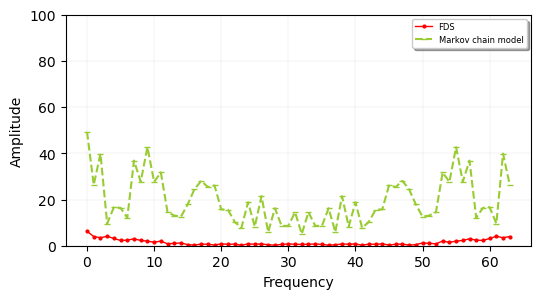

FFT 그래프 간의 상관관계: 0.6247977408058019


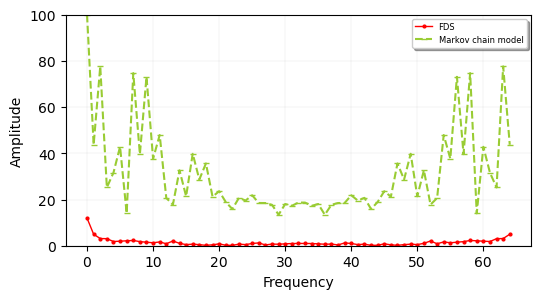

FFT 그래프 간의 상관관계: 0.6027027919252952


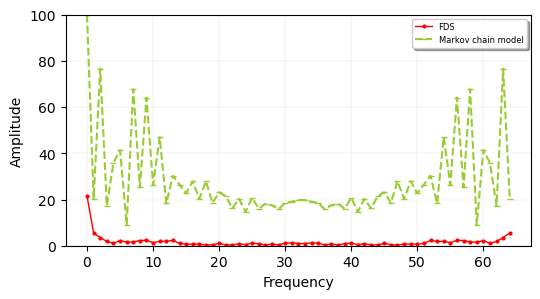

FFT 그래프 간의 상관관계: 0.589781966288615


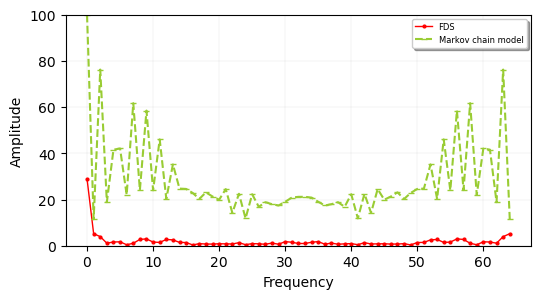

In [112]:
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1, True)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2, True)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3, True)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4, True)

In [90]:
def mean_absolute_error(y_true, y_pred):
    """
    평균 절대 오차(MAE)를 계산하는 함수
    :param y_true: 실제 값이 담긴 배열
    :param y_pred: 예측 값이 담긴 배열
    :return: MAE 값
    """
    n = len(y_true)
    if n != len(y_pred):
        raise ValueError("실제 값과 예측 값의 길이가 동일해야 합니다.")
    absolute_errors = [abs(y_true[i] - y_pred[i]) for i in range(n)]
    mae = sum(absolute_errors) / n
    return mae

print(mean_absolute_error(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(mean_absolute_error(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(mean_absolute_error(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(mean_absolute_error(p_df_4th['probability (400s elapsed)'].values,Z_4))

0.789246791885353
1.513799628199112
1.5104900239334984
1.4697105857225008


In [25]:
# 유클리드 유사도 
def euclidean_distance(model, real):
    euclidean_distance = np.linalg.norm(model - real)
    return euclidean_distance

print('............EUCLIDEAN.............')
print(euclidean_distance(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(euclidean_distance(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(euclidean_distance(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(euclidean_distance(p_df_4th['probability (400s elapsed)'].values,Z_4))

# 코사인 유사도
from scipy.spatial.distance import cosine
def cosine_simularity(model, real):
    cosine_simularity = 1-cosine(model, real)
    return cosine_simularity

print('............COSINE.............')
print(cosine_simularity(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(cosine_simularity(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(cosine_simularity(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(cosine_simularity(p_df_4th['probability (400s elapsed)'].values,Z_4))

............EUCLIDEAN.............
21.170708613198084
35.261527352816884
31.61154342318445
31.145593984151926
............COSINE.............
0.566805681652967
0.6817917123235908
0.5998114602117071
0.5139665459730401
